# 지도 학습
- 입력과 출력 샘플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할때 사용

## 분류
- 미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측하는 것
- 딱 두 개의 클래스로 분류하는 이진 분류와 셋 이상의 클래스로 분류하는 다중 분류로 나뉨
- 이진 분류는 질문의 답이 예/아니오만 나올 수 있도록 하는 것 (e.g. 이메일 에서 스팸 분류하는 것)
- 예상 출력 값 사이에 연속성이 없다면 회귀 (e.g. 웹사이트의 글로부터 어떤 언어의 웹사이트인지를 예측 -> 어느 정도라는 것이 없음. 즉 웹사이트 언어는 한 언어가 아니면 다른 언어. 언어들 사이에는 어떠한 연속성이 없으므로 분류)

## 회귀
- 연속적인 숫자, 또는 프로그래밍 용어로 말하면 부동소수점수를 예측 (e.g. 어떤 사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측)
- 예상 출력 값 사이에 연속성이 있다면 회귀 (e.g. 어떤 사람이 1년에 4천만원을 벌지 3900만원을 벌지 예측하는 것은 회귀)

## 일반화
- 지도 학습에서는 훈련 데이터로 학습한 모델이 훈련 데이터와 특성이 같다면 처음 보는 새로운 데이터가 주어져도 정확히 예측할 거라 기대
- 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련 세트에서 테스트 세트로 일반화 되었다고 함
- 모델을 만들 때는 가능한 한 정확하게 일반화되도록 해야 함

## 과대적합
- 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것
- 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 일어남

## 과소적합
- 모델이 너무 간단 (e.g. 집이 있는 사람은 모두 요트를 살 것)
- 데이터의 면면과 다양성을 잡아내지 못할 것이고 훈련 세트에도 잘 맞지 않을 것

# 데이터셋 생성

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import mglearn

Text(0, 0.5, 'Second Characteristic')

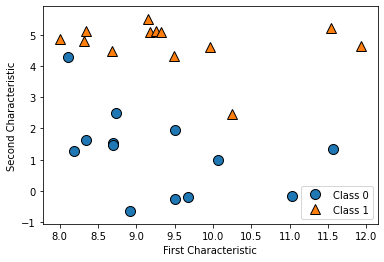

In [2]:
# 데이터셋 생성
X, y = mglearn.datasets.make_forge()
# 산점도 작성
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First Characteristic')
plt.ylabel('Second Characteristic')

In [3]:
print('X.shape: ', X.shape)

X.shape:  (26, 2)


-> 데이터 포인트 26개와 특성 2개를 가진 데이터셋

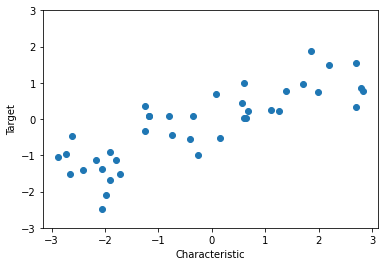

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Characteristic')
plt.ylabel('Target');

In [5]:
import numpy as np
from sklearn.datasets import load_breast_cancer

In [6]:
cancer = load_breast_cancer()
print('cancer.keys():\n', cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
print('유방암 데이터의 형태: ', cancer.data.shape)

유방암 데이터의 형태:  (569, 30)


-> 569개의 데이터 포인트를 가지고 있고 특성은 30개

In [8]:
print('클래스별 샘플 개수:\n',
     {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


-> 212개는 악성이고 357개는 양성

In [9]:
# feature_names의 속성 확인
print('특성 이름:\n', cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
from sklearn.datasets import load_boston

boston = load_boston()
print('데이터의 형태: ', boston.data.shape)

데이터의 형태:  (506, 13)


In [11]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape: ', X.shape)

X.shape:  (506, 104)


## k-최근접 이웃
- 가장 간단한 머신러닝 알고리즘으로서, 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부
- 새로운 데이터 포인트에 대해 예측할 때 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트인 '최근접 이웃'을 서칭

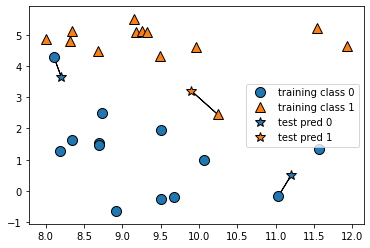

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

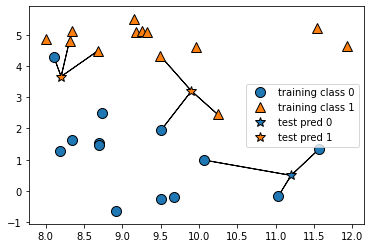

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [14]:
from sklearn.model_selection import train_test_split

# Devide into train and test sets
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)